# Assignment 1
### Kristoffer Ryberg

This notebook contains three exercises from the exercise sets we covered prior to moving the teaching online. It will count as one of the two assignments you need to submit to qualify for the exam. **The deadline** for handing in this assignment is **April 3.** You hand in by pushing your solutions to your folder in the exercise repo.

## Problems from exercise set 2
> **Ex. 2.1.1**: The performance of a random forest classifier is highly sensitive to hyper parameters. Therefore, you should be intimately familiar with what the most important ones do. For each point below, explain what the hyper parameter pertaining to `sklearn.ensemble.RandomForestClassifier` controls, and how setting it either too low or too high (or True/False) might hurt model performance:
1. `n_estimators`
2. `max_depth`
3. `max_features`
4. `bootstrap`

**Answer**
1. `n_estimators` is the number of trees in the forest. In general, the larger the number of trees, the better performance, however it comes at the price of increased computational cost.

2. `max_depth` is the maximum depth of the tree, i.e. the longest path from a root to a leaf allowed. Setting the max_depth too low, will result in too simple a model, which will perform poorly on both training and test data. However, setting the max_depth too high (None is default, and will leave you with only pure leaves), might result in overfitting and poor accuracy in test data.

3. `max_features` is the the maximum number of feautures considered when doing a split. The more feautures, the better chance of finding the best split, and thus increase the accuracy of the model. However, choosing too many feautures might increase the correlation. The tree favors the feautures that provide the highest information gain (usually the splits used at the top of the tree). Thus the feautures that are highly correlated, and provides little information gain, is usually located deeper down in the tree. These might be redundant, and can possibly be removed from the model, without decreasing the accuracy score on test data. Using the .get_support() "from sklearn.feature_selection import SelectFromModel", can help choose the most important feautures of the model.

4. `bootstrap` is a boolean. If true, bootstrap sampling is used for the training of each tree, and if false, the whole sample is used to build each tree.

> **Ex. 2.1.2**: For `n_estimators > 1`how should one set the hyper-parameters `max_features` and `bootstrap` so that all the trees in the ensemble end up identical?

**Answer**

If `max_features = n_features` and `bootstrap = false`, the same data is used for all trees, and all feautures are considered for each split - thus the optimal split for each tree would be the same, and the trees would end up identical.

## Problems from exercise set 3

> **Ex. 3.1.2**: Reproduce the figure from the slides that compares PCA, LDA, t-SNE and UMAP as applied to the digits dataset.
1. Do it for the digits dataset (same as in slides)
2. Do it also for the wine dataset. What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
3. Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
>
> *Hint: You can use [this class](https://github.com/ulfaslak/ulf_pytools/blob/7f4f1eb7e2d721851c8dacb20904478b19090f2a/ulf.py#L451) for making coloring easier. It lets you create a function that takes a category as input and returns an associated color. Read the docstring for usage example.*

In [1]:
# Class for coloring
from scipy.interpolate import interp1d
class cmap_in_categories:
    """Create map to range of colors inside given categories.
    Example
    -------
    >>> cmap = cmap_in_categories(['cats', 'dogs', 'squirrels'])
    >>> cmap('squirrels')
    (0.30392156862745101, 0.30315267411304353, 0.98816547208125938, 1.0)
    """
    def __init__(self, cmap_categories, cmap_range=[0, 1], cmap_style='rainbow'):
        self.cmap_domain_map = dict(list(zip(cmap_categories, list(range(len(cmap_categories))))))
        self.cmap_domain = [min(self.cmap_domain_map.values()), max(self.cmap_domain_map.values())]
        self.cmap_categories = cmap_categories
        self.cmap_range = cmap_range
        self.m = interp1d(self.cmap_domain, self.cmap_range)
        self.cmap = plt.get_cmap(cmap_style)
        
    def __call__(self, category):
        if not category in self.cmap_categories:
            raise Exception("Category must be inside cmap_categories.")
        return self.cmap(self.m(self.cmap_domain_map[category]))

In [30]:
#Importing all packages
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from umap import UMAP
#Import datasets
from sklearn.datasets import load_wine
from sklearn.datasets import load_digits

#Load the digits data
data_dig = load_digits()
X_dig = data_dig['data']
y_dig = data_dig['target']

#PCA, LDA, tSNE and umap for digits:
PCA_dig = PCA(n_components=2).fit_transform(X_dig)
LDA_dig = LDA(n_components=2).fit_transform(X_dig, y_dig)
tSNE_dig = TSNE(n_components=2).fit_transform(X_dig)
umap_dig = UMAP(n_components=2).fit_transform(X_dig)

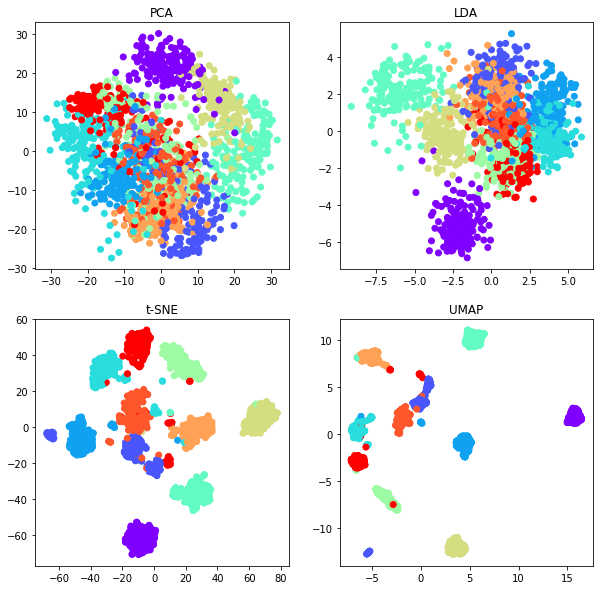

In [56]:
#Colors
cmap_dig = cmap_in_categories(sorted(set(y_dig)))
c_dig = [cmap_dig(i) for i in y_dig]
#Plot:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle = "Digits"
ax[0, 0].scatter(PCA_dig[:, 0], PCA_dig[:,1], c=c_dig)
ax[0, 0].title.set_text('PCA')
ax[0, 1].scatter(LDA_dig[:, 0], LDA_dig[:, 1], c=c_dig)
ax[0, 1].title.set_text('LDA')
ax[1, 0].scatter(tSNE_dig[:, 0], tSNE_dig[:, 1], c=c_dig)
ax[1, 0].title.set_text('t-SNE')
ax[1, 1].scatter(umap_dig[:, 0], umap_dig[:, 1], c=c_dig)
ax[1, 1].title.set_text('UMAP')

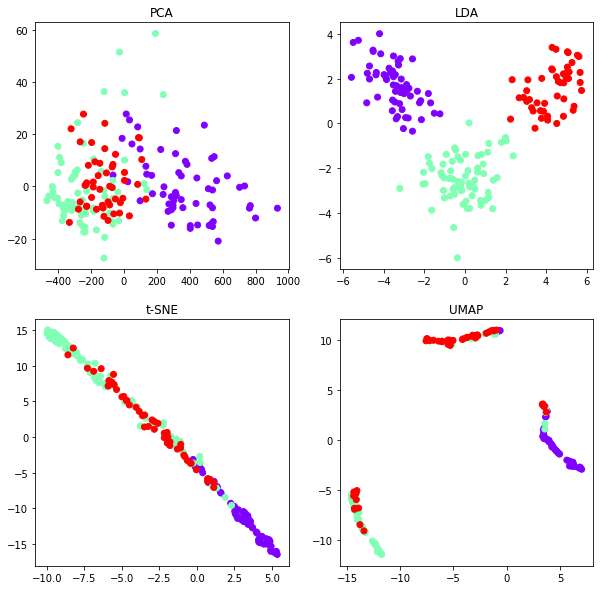

In [55]:
#Non-standardized wine data
#Load the wine data
data_wine = load_wine()
X_wine = data_wine['data']
y_wine = data_wine['target']

#PCA, LDA, tSNE and umap for wine:
PCA_wine = PCA().fit_transform(X_wine)
LDA_wine = LDA().fit_transform(X_wine, y_wine)
tSNE_wine = TSNE().fit_transform(X_wine)
umap_wine = UMAP().fit_transform(X_wine)

#Colors
cmap_wine = cmap_in_categories(sorted(set(y_wine)))
c_wine = [cmap_wine(i) for i in y_wine]

#Plot:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle = "Wine, Non-standardized"
ax[0, 0].scatter(PCA_wine[:, 0], PCA_wine[:,1], c=c_wine)
ax[0, 0].title.set_text('PCA')
ax[0, 1].scatter(LDA_wine[:, 0], LDA_wine[:, 1], c=c_wine)
ax[0, 1].title.set_text('LDA')
ax[1, 0].scatter(tSNE_wine[:, 0], tSNE_wine[:, 1], c=c_wine)
ax[1, 0].title.set_text('t-SNE')
ax[1, 1].scatter(umap_wine[:, 0], umap_wine[:, 1], c=c_wine)
ax[1, 1].title.set_text('UMAP')

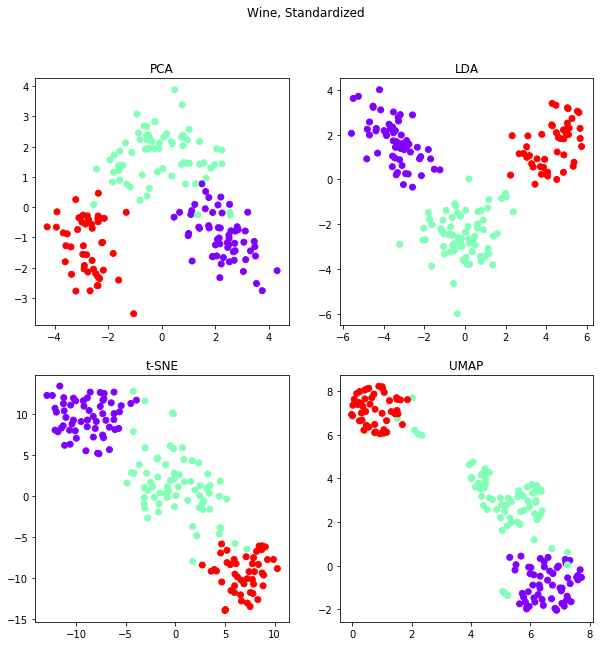

In [52]:
#Now, standardizing the wine data:
ssc = StandardScaler()
#PCA, LDA, tSNE and umap for wine:
X_wine_std = ssc.fit_transform(X_wine)

PCA_wine_std = PCA().fit_transform(X_wine_std)
LDA_wine_std = LDA().fit_transform(X_wine_std, y_wine)
tSNE_wine_std = TSNE().fit_transform(X_wine_std)
umap_wine_std = UMAP().fit_transform(X_wine_std)

#Colors
cmap_wine_std = cmap_in_categories(sorted(set(y_wine)))
c_wine_std = [cmap_wine_std(i) for i in y_wine]

#Plot:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("Wine, Standardized")
ax[0, 0].scatter(PCA_wine_std[:, 0], PCA_wine_std[:,1], c=c_wine_std)
ax[0, 0].title.set_text('PCA')
ax[0, 1].scatter(LDA_wine_std[:, 0], LDA_wine_std[:, 1], c=c_wine_std)
ax[0, 1].title.set_text('LDA')
ax[1, 0].scatter(tSNE_wine_std[:, 0], tSNE_wine_std[:, 1], c=c_wine_std)
ax[1, 0].title.set_text('t-SNE')
ax[1, 1].scatter(umap_wine_std[:, 0], umap_wine_std[:, 1], c=c_wine_std)
ax[1, 1].title.set_text('UMAP')

In [57]:
y_wine

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

- What problems do you observe if you don't standardize the wine dataset? Why is this not a problem with the digits data?
    - The methods used are sensitive to scales of measures - and since the features of the wine data are of different scaling, they perform poorly without standardizing the data. For the digits data, the features are already of same scale, and as such, it does not suffer from the same issues.
- Comment on the differences you observe as well as the applicability (and necessity thereof) of different methods for different data.
    - PCA, t-SNE and UMAP are very sensitive to scales of measure, and as such perform poorly if the features of the data aren't of the same scale. This is not the case for LDA (eigenvalues stay the same).
    - t-SNE and UMAP are non-linear techniques, while PCA and LDA are linear. Thus, when the data have a non-linear structure (high dimensional data), PCA and LDA loose their effictiveness. This can be seen in the digits data, where t-SNE and UMAP performs way better.

## Problems from exercise set 4

In this problem we will try to implement and understand some of the ideas used in [Athey, Imbens (2015)](https://www.pnas.org/content/pnas/113/27/7353.full.pdf) to develop _Honest Inference_ in desicion tree models. The paper begins by covering honesty in a setting of population averages, and for estimating conditional means; so you will need to look towards the second half of the paper to get an impression of it's use for treatment-effect estimation.

> **Ex. 4.2.1:** What does it mean that a tree is _honest?_ In particular what are the implications in terms of 
> * The intuition for why honesty is required in order to get good local treatment effect estimates?
> * The practical implementation of the DT algorithm?

**Answer**

Athey suggestion for _honest estimation_ is to use seperate data for selecting the model structure and for estimating effects (within the model structure). Implementing this, the training data is split in half, where the first half is used to construct the decision trees, and the second half is used to estimate treatment-effect within the leaves of the tree.

Using this method, biases from spurious correlations can be avoided, and we can obtain unbiases "honest" estimates.